#### Importing Required Librabries

In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read the data

In [208]:
df = pd.read_csv('dataframe_.csv')

df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


#### Exploratory Data-Analysis

In [209]:
df.shape

(1697, 2)

In [210]:
df.columns

Index(['input', 'output'], dtype='object')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [212]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [213]:
df.isna().sum()

input     1
output    1
dtype: int64

In [214]:
num = df.select_dtypes(include = 'number')
num

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


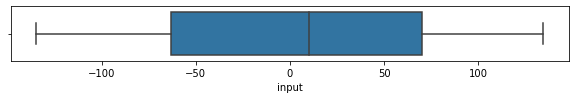

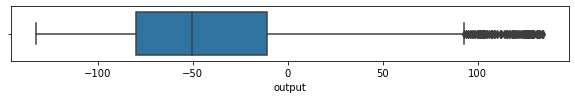

In [215]:
for i in num:
    plt.figure(figsize=(10,1))
    sns.boxplot(data = num,x = i)

Observation : The above Box plot shows that "output features' has outliers on positive side.

#### Filling null values

In [216]:
df['output'] = df['output'].fillna(df['output'].median())

In [217]:
df['input'] = df['input'].fillna(df['input'].mean())

In [218]:
df.isna().sum()

input     0
output    0
dtype: int64

#### Removing Outliers from the feature - 'output'

In [219]:
q1 = df['output'].quantile(0.25)
q3 = df['output'].quantile(0.75)

iqr = q3 - q1
lb = q1 - (1.5*iqr)

ub = q3 + (1.5*iqr)


Outliers = df[(df['output'] < lb) | (df['output'] > ub)].index
print(len(Outliers))
df.drop(Outliers,inplace=True)

144


In [220]:
df['input'].value_counts()

-119.366669    8
-131.366669    8
 80.633331     7
-112.366669    6
 20.633331     6
              ..
-20.049985     1
-25.374926     1
-17.023933     1
-14.879573     1
 1.159933      1
Name: input, Length: 897, dtype: int64

In [221]:
df['output'].value_counts()

-95.000000     32
-33.000000     12
-78.000000     12
-32.000000     10
-75.000000     10
               ..
-104.595355     1
-102.423597     1
-85.280049      1
-79.156025      1
-50.470981      1
Name: output, Length: 862, dtype: int64

In [222]:
#appling max function to each column 

df.apply(np.max)

input     132.281489
output     92.537079
dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='input', ylabel='Density'>

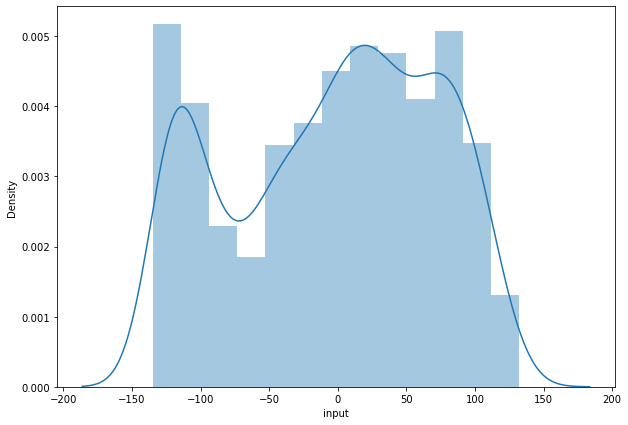

In [223]:
#Histogram and kde
plt.figure(figsize=(10,7))
sns.distplot(df['input'])



Observation : The above Histogram plot shows that the density of "input variable" is distributed between the range of approx -130 to +125.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='output'>

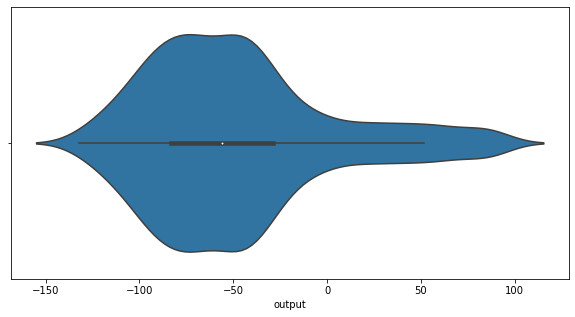

In [224]:
#Violin plot
plt.figure(figsize=(10,5))
sns.violinplot(df['output'])

Observation : The above violin plot shows that the the density of "output variable" is high between range -50 to -120 approx.

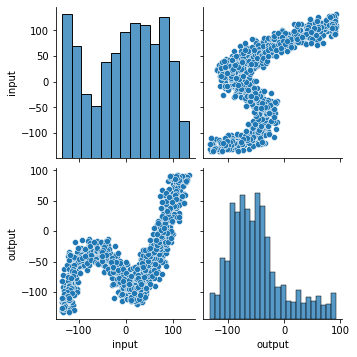

In [225]:
sns.pairplot(df)

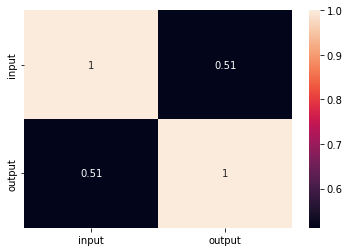

In [226]:
#Heatmap
num_corr = num.corr()
sns.heatmap(num_corr,annot=True)
plt.show()

Observation : On above graph each square shows the correlation between the variables on each axis.Correlation ranges from -1 to +1.Values closer to zero means there is no linear trend between the two variables.

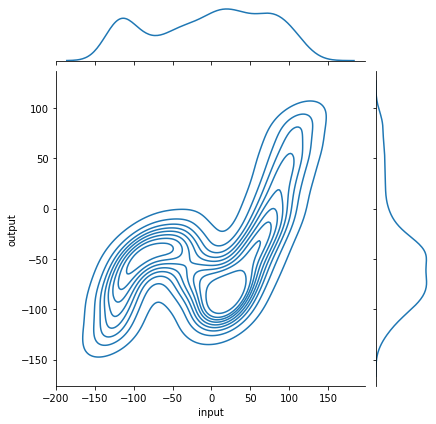

In [227]:
#jointmap
sns.jointplot(x='input', y='output',\
              data=df, kind='kde')

Observation : The above jointplot comprises three plots. Out of three,one plot displays a bivariate graph which is the scatter plot between input and output variable.Another plot is placed horizontally at the top of the graph show the distribution of 'input variable' and another plot placed vertically shows distribution of 'output variable'

### Implementation of ML Model

In [228]:
#Seggregate input and output
X = df[['input']]
y = df[['output']]
  


In [229]:
#spliting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1164, 1) (1164, 1)
(389, 1) (389, 1)


In [230]:
X_train_num = X_train.select_dtypes(include= 'number')
X_train_num

,input
1128,-127.366669
979,55.750402
1148,-99.712553
1017,97.082202
1627,21.568882
...,...
53,-112.866909
371,35.282362
79,-85.414557
850,-126.366669


In [231]:
#Applying rescaling on train data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_num_ss = pd.DataFrame(scaler.fit_transform(X_train_num,y_train),
                              columns = X_train_num.columns,
                              index =X_train_num.index)
X_train_num_ss

,input
1128,-1.661139
979,0.780028
1148,-1.292477
1017,1.331030
1627,0.324348
...,...
53,-1.467840
371,0.507165
79,-1.101867
850,-1.647807


In [232]:
X_test_num = X_test.select_dtypes(include ='number')
X_test_num

,input
1626,18.633331
1244,-60.984042
899,7.225553
993,79.183245
1593,-120.256354
...,...
587,47.633331
583,51.633331
222,8.633331
705,-39.212261


In [233]:
#Appling rescaling on test data
X_test_num_ss = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_ss.head()

,input
1626,0.285214
1244,-0.776180
899,0.133135
993,1.092416
1593,-1.566350


### Building of Models and Evaluation :

In [234]:

#Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

In [235]:
from sklearn.metrics import mean_absolute_error
a =  mean_absolute_error(y_test,y_test_predict)
a

33.75450229804119

<AxesSubplot:ylabel='Count'>

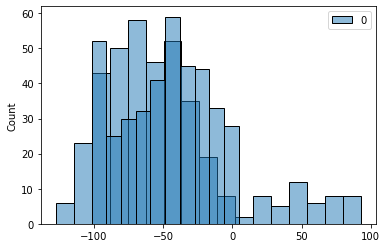

In [236]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [237]:
#randomforest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

C:\Users\dell\AppData\Local\Temp\ipykernel_7788\4238410177.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train_num_ss, y_train)


In [238]:
from sklearn.metrics import mean_absolute_error
b =  mean_absolute_error(y_test,y_test_predict)
b

12.447321672263849

<AxesSubplot:ylabel='Count'>

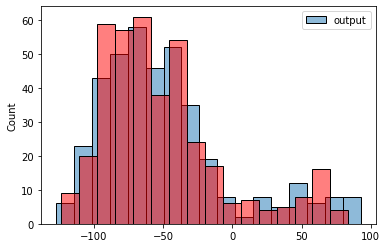

In [239]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [240]:
#SupportVectorRegressor
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [241]:
from sklearn.metrics import mean_absolute_error
c =  mean_absolute_error(y_test,y_test_predict)
c

16.20815440613016

<AxesSubplot:ylabel='Count'>

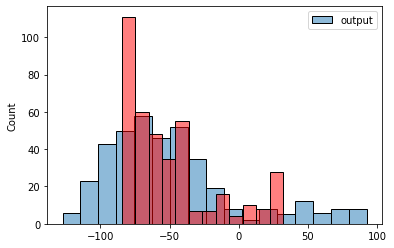

In [242]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [243]:
#GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [244]:
from sklearn.metrics import mean_absolute_error
d =  mean_absolute_error(y_test,y_test_predict)
d

13.416274243053188

<AxesSubplot:ylabel='Count'>

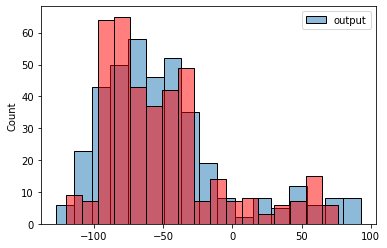

In [245]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [246]:
#AdaboostRegressor
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [247]:
from sklearn.metrics import mean_absolute_error
e =  mean_absolute_error(y_test,y_test_predict)
e

16.28632141068469

<AxesSubplot:ylabel='Count'>

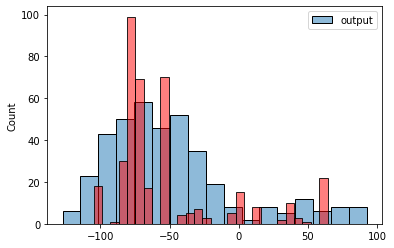

In [248]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [249]:
#KNearestNeighbor
from sklearn.neighbors import KNeighborsRegressor
regressor =  KNeighborsRegressor()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

In [250]:
from sklearn.metrics import mean_absolute_error
f =  mean_absolute_error(y_test,y_test_predict)
f

15.106525266471978

<AxesSubplot:ylabel='Count'>

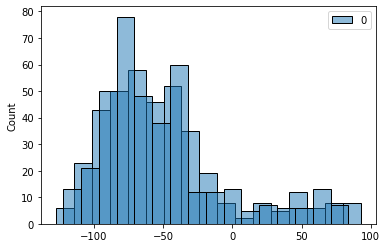

In [251]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [252]:
#DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
regressor =  DecisionTreeRegressor()
regressor.fit(X_train_num_ss, y_train)
y_test_predict = regressor.predict(X_test_num_ss)

In [253]:
from sklearn.metrics import mean_absolute_error
g =  mean_absolute_error(y_test,y_test_predict)
g

9.675165489893011

<AxesSubplot:ylabel='Count'>

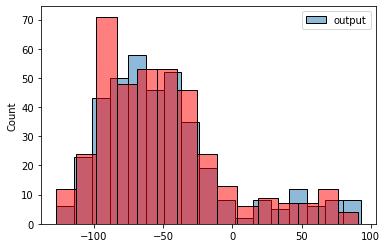

In [254]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_predict, color='red', alpha=0.5)

In [255]:
df2 = pd.DataFrame({'Model':['Linear Regression','RandomForest Regressor','SVR','GradientBoostingDT','AdaBoost','KNN','DecisionTreeRegressor'],'Accuracy_score':[a,b,c,d,e,f,g]})
df2

,Model,Accuracy_score
0,Linear Regression,33.754502
1,RandomForest Regressor,12.447322
2,SVR,16.208154
3,GradientBoostingDT,13.416274
4,AdaBoost,16.286321
5,KNN,15.106525
6,DecisionTreeRegressor,9.675165


<AxesSubplot:xlabel='Accuracy_score', ylabel='Model'>

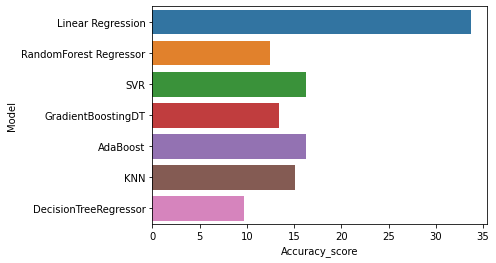

In [256]:
sns.barplot(y= df2.Model,x=df2.Accuracy_score)

### Conclusion :

- DecisionTree Regressor' algorithm is the best model for this data-set as it is giving least 'mean absolute error'.

### Hyperparameter Tuning

In [257]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

l1, l2 = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = KNeighborsRegressor(n_neighbors=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = mean_absolute_error(y_train, y_train_pred)
    l1.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = mean_absolute_error(y_test, y_test_pred)
    l2.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 0.633, test: 9.766
> 2, train: 5.010, test: 14.787
> 3, train: 9.451, test: 15.800
> 4, train: 11.160, test: 15.335
> 5, train: 12.056, test: 15.111
> 6, train: 12.886, test: 14.875
> 7, train: 13.212, test: 14.699
> 8, train: 13.635, test: 14.414
> 9, train: 13.929, test: 14.500
> 10, train: 14.121, test: 14.347
> 11, train: 14.257, test: 14.164
> 12, train: 14.286, test: 14.139
> 13, train: 14.381, test: 14.120
> 14, train: 14.369, test: 14.159
> 15, train: 14.336, test: 14.121
> 16, train: 14.399, test: 14.076
> 17, train: 14.445, test: 14.106
> 18, train: 14.481, test: 14.138
> 19, train: 14.429, test: 14.097
> 20, train: 14.531, test: 14.148


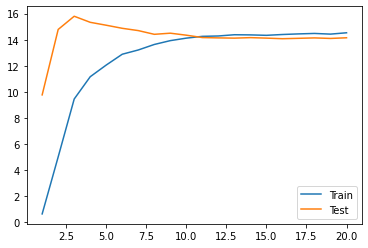

In [258]:
plt.plot(values, l1, label='Train')
plt.plot(values, l2 , label='Test')
plt.legend()
plt.show()

In [259]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

l1, l2 = list(), list()

values = [i for i in range(1, 21)]

for i in values:
    model = DecisionTreeRegressor(max_depth=i)

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    train_score = mean_absolute_error(y_train, y_train_pred)
    l1.append(train_score)

    y_test_pred = model.predict(X_test)
    test_score = mean_absolute_error(y_test, y_test_pred)
    l2.append(test_score)

    print('> %d, train: %.3f, test: %.3f' % (i, train_score, test_score))

> 1, train: 25.795, test: 24.025
> 2, train: 22.154, test: 21.212
> 3, train: 20.197, test: 19.784
> 4, train: 17.231, test: 17.147
> 5, train: 14.670, test: 14.965
> 6, train: 12.943, test: 14.124
> 7, train: 11.729, test: 14.071
> 8, train: 9.863, test: 14.332
> 9, train: 8.307, test: 13.678
> 10, train: 7.075, test: 13.575
> 11, train: 5.772, test: 13.180
> 12, train: 4.475, test: 12.637
> 13, train: 3.462, test: 12.136
> 14, train: 2.476, test: 11.156
> 15, train: 1.885, test: 10.767
> 16, train: 1.583, test: 10.608
> 17, train: 1.359, test: 10.196
> 18, train: 1.199, test: 10.175
> 19, train: 1.016, test: 9.904
> 20, train: 0.866, test: 9.758


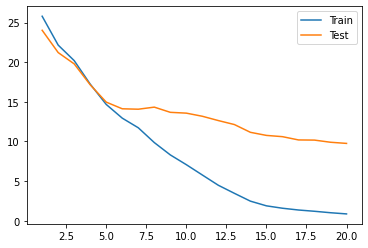

In [260]:
plt.plot(values, l1, label='Train')
plt.plot(values, l2 , label='Test')
plt.legend()
plt.show()

### Building a Linear Regression model by performing feature engineering.


In [261]:
from sklearn.preprocessing import PolynomialFeatures
features = PolynomialFeatures(degree=2)
X_poly = features.fit_transform(df[['input']])
X_poly

array([[ 1.00000000e+00, -1.22740667e+02,  1.50652714e+04],
       [ 1.00000000e+00, -1.21531419e+02,  1.47698859e+04],
       [ 1.00000000e+00, -1.34917019e+02,  1.82026020e+04],
       ...,
       [ 1.00000000e+00,  3.16333313e+01,  1.00066765e+03],
       [ 1.00000000e+00,  2.90914577e+01,  8.46312913e+02],
       [ 1.00000000e+00,  1.71452960e+01,  2.93961173e+02]])

In [262]:
trans_df = pd.DataFrame(X_poly, columns=['I_0', 'I_1', 'I_2'])

trans_df['output'] = df['output']

trans_df.head()

,I_0,I_1,I_2,output
0,1.0,-122.740667,15065.271434,-130.572085
1,1.0,-121.531419,14769.885901,-129.938929
2,1.0,-134.917019,18202.602016,-130.141832
3,1.0,-120.605951,14545.795441,-125.760932
4,1.0,-129.894781,16872.654053,-112.785214


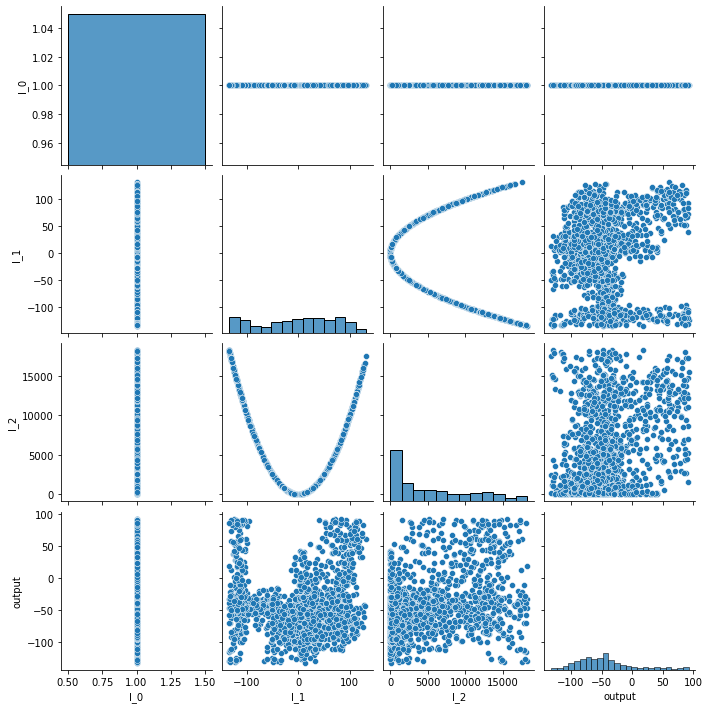

In [263]:
sns.pairplot(trans_df)

In [264]:
trans_df = trans_df.dropna()

In [265]:
regressor = LinearRegression()
regressor.fit(trans_df[['I_0', 'I_1', 'I_2']], trans_df['output'])

LinearRegression()

In [266]:
print(regressor.coef_,regressor.intercept_)

[0.         0.12714977 0.00369162] -62.66132620126008


In [267]:
predict = regressor.predict(trans_df[['I_0', 'I_1', 'I_2']])
predict

array([-22.6524415 , -23.58913851, -12.61881383, ..., -54.94506563,
       -55.83808407, -59.39611131])